In [20]:
from Crypto.Cipher import DES, DES3, AES
from Crypto.Random import get_random_bytes
from Crypto.Util.Padding import pad, unpad
import base64

def generate_des_key():
	return get_random_bytes(8)  # Clave de 64 bits (8 bytes)

def des_encrypt(data, key):
	cipher = DES.new(key, DES.MODE_ECB)
	padded_data = pad(data, DES.block_size)
	encrypted_data = cipher.encrypt(padded_data)
	return encrypted_data

def des_decrypt(encrypted_data, key):
	cipher = DES.new(key, DES.MODE_ECB)
	decrypted_data = unpad(cipher.decrypt(encrypted_data), DES.block_size)
	return decrypted_data

# 3DES CBC Implementation
def generate_3des_key():
	return DES3.adjust_key_parity(get_random_bytes(24))  # Clave de 192 bits (24 bytes)

def generate_iv():
	return get_random_bytes(8)  # IV de 8 bytes para CBC

def triple_des_encrypt(data, key, iv):
	cipher = DES3.new(key, DES3.MODE_CBC, iv)
	padded_data = pad(data, DES3.block_size)
	encrypted_data = cipher.encrypt(padded_data)
	return iv + encrypted_data

def triple_des_decrypt(encrypted_data, key):
	iv, encrypted_data = encrypted_data[:8], encrypted_data[8:]
	cipher = DES3.new(key, DES3.MODE_CBC, iv)
	decrypted_data = unpad(cipher.decrypt(encrypted_data), DES3.block_size)
	return decrypted_data

# AES Implementation
def generate_aes_key():
	return get_random_bytes(32)  # Clave de 256 bits

def aes_encrypt(data, key, mode):
	iv = get_random_bytes(16)  # IV de 16 bytes para CBC
	cipher = AES.new(key, mode, iv) if mode == AES.MODE_CBC else AES.new(key, mode)
	padded_data = pad(data, AES.block_size)
	encrypted_data = cipher.encrypt(padded_data)
	return iv + encrypted_data if mode == AES.MODE_CBC else encrypted_data

def aes_decrypt(encrypted_data, key, mode):
	if mode == AES.MODE_CBC:
		iv, encrypted_data = encrypted_data[:16], encrypted_data[16:]
		cipher = AES.new(key, mode, iv)
	else:
		cipher = AES.new(key, mode)
	decrypted_data = unpad(cipher.decrypt(encrypted_data), AES.block_size)
	return decrypted_data

# Procesamiento de imágenes
def encrypt_image(image_path, key, mode):
	with open(image_path, "rb") as f:
		image_data = f.read()
	encrypted_data = aes_encrypt(image_data, key, mode)
	with open(image_path + ".enc", "wb") as f:
		f.write(encrypted_data)

def decrypt_image(encrypted_path, key, mode, output_path):
	with open(encrypted_path, "rb") as f:
		encrypted_data = f.read()
	decrypted_data = aes_decrypt(encrypted_data, key, mode)
	with open(output_path, "wb") as f:
		f.write(decrypted_data)

# Pruebas unitarias
def test_encryption():
	message = "The DES block cipher is a 16-round Feistel network with a block length of 64 bits and a key length of 56 bits. The same round function ˆ f is used in each of the 16 rounds. The round function takes a 48-bit sub-key and, as expected for a (balanced) Feistel network, a 32-bit input (namely, half a block). The key schedule of DES is used to derive a sequence of 48-bit sub-keys k1, . . . , k16 from the 56-bit master key."
	message = message.encode("utf-8")
	# DES
	des_key = generate_des_key()
	des_encrypted = des_encrypt(message, des_key)
	assert message == des_decrypt(des_encrypted, des_key)
	
	# 3DES
	des3_key = generate_3des_key()
	iv = generate_iv()
	des3_encrypted = triple_des_encrypt(message, des3_key, iv)
	assert message == triple_des_decrypt(des3_encrypted, des3_key)
	
	# AES CBC
	aes_key = generate_aes_key()
	aes_encrypted_cbc = aes_encrypt(message, aes_key, AES.MODE_CBC)
	assert message == aes_decrypt(aes_encrypted_cbc, aes_key, AES.MODE_CBC)
	
	# AES ECB
	aes_encrypted_ecb = aes_encrypt(message, aes_key, AES.MODE_ECB)
	assert message == aes_decrypt(aes_encrypted_ecb, aes_key, AES.MODE_ECB)

	message = "The main weakness of DES is its short key. It thus makes sense to try to design a block cipher with a larger key length using DES as a building block. Some approaches to doing so are discussed in this section. Although we refer to DES frequently throughout the discussion, and DES is the most prominent block cipher to which these techniques have been applied, everything we say here applies generically to any block cipher."
	message = message.encode("utf-8")
	# DES
	des_key = generate_des_key()
	des_encrypted = des_encrypt(message, des_key)
	assert message == des_decrypt(des_encrypted, des_key)
	
	# 3DES
	des3_key = generate_3des_key()
	iv = generate_iv()
	des3_encrypted = triple_des_encrypt(message, des3_key, iv)
	assert message == triple_des_decrypt(des3_encrypted, des3_key)
	
	# AES CBC
	aes_key = generate_aes_key()
	aes_encrypted_cbc = aes_encrypt(message, aes_key, AES.MODE_CBC)
	assert message == aes_decrypt(aes_encrypted_cbc, aes_key, AES.MODE_CBC)
	
	# AES ECB
	aes_encrypted_ecb = aes_encrypt(message, aes_key, AES.MODE_ECB)
	assert message == aes_decrypt(aes_encrypted_ecb, aes_key, AES.MODE_ECB)

	image_path = "pic.png"
	aes_key = generate_aes_key()
	
	# AES CBC
	encrypt_image(image_path, aes_key, AES.MODE_CBC)
	decrypt_image(image_path + ".enc", aes_key, AES.MODE_CBC, "test_image_dec_cbc.jpg")
	
	# AES ECB
	encrypt_image(image_path, aes_key, AES.MODE_ECB)
	decrypt_image(image_path + ".enc", aes_key, AES.MODE_ECB, "test_image_dec_ecb.jpg")
	
	print("Todas las pruebas pasaron correctamente.")

test_encryption()


Todas las pruebas pasaron correctamente.


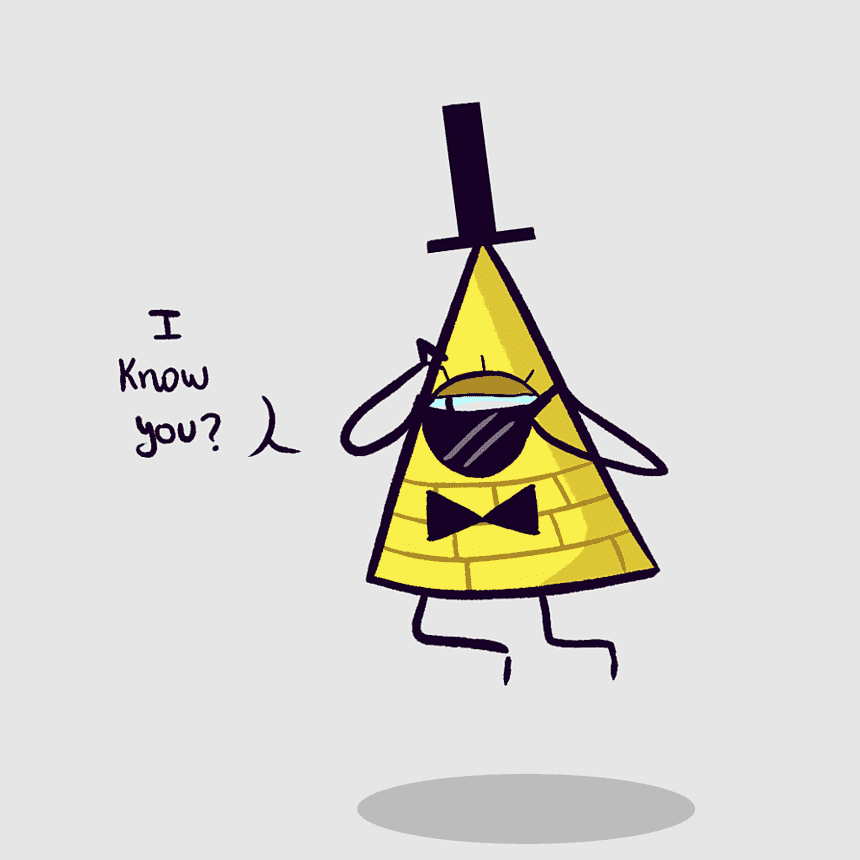

In [25]:
from IPython.display import Image
Image(filename='test_image_dec_cbc.jpg')

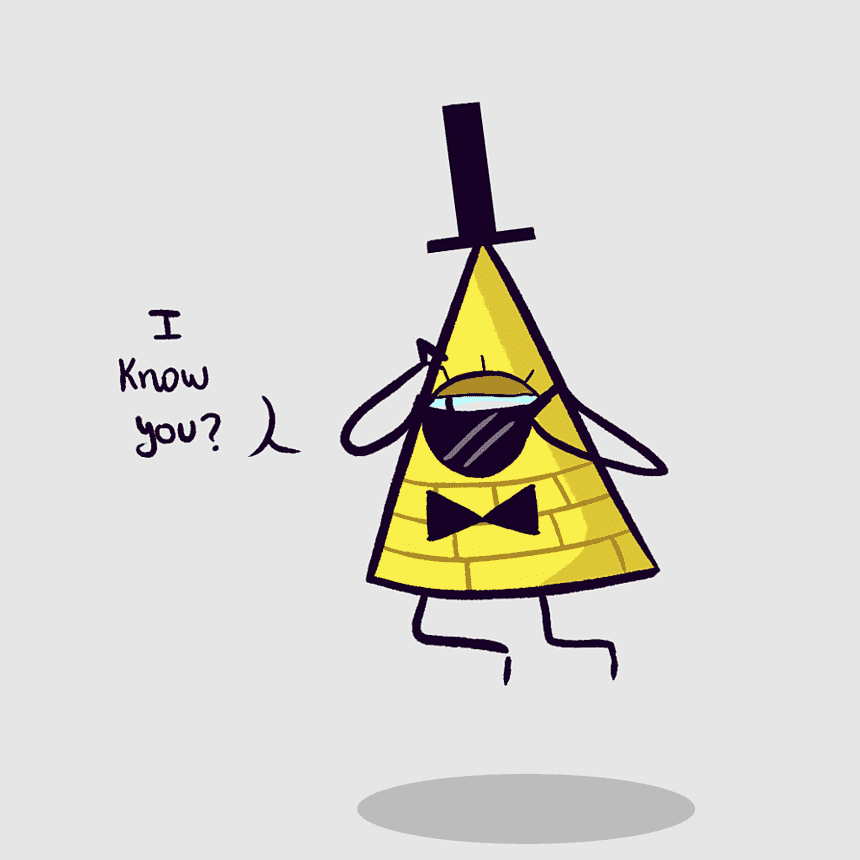

In [26]:
from IPython.display import Image
Image(filename='test_image_dec_ecb.jpg')